# Business Objective:
Lending loans to ‘risky’ applicants is the largest source of financial loss. In other words, borrowers who default cause the largest amount of loss to the lenders.

Identification of such applicants using EDA is the aim of this case study.
The company wants to understand the driving factors behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

loan = pd.read_csv("./loan.csv", low_memory=False)
loan.shape

(39717, 111)

In [2]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Data cleaning
# Identify columns that can be dropped

In [3]:
# express missing values per column as % of total lumber of values to check for column level density
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2)

# identify columns where more than 50% records are blank. Such columns are eligible for dropping 
len(missing[missing> 50])

57

In [4]:
# drop 57 columns which had more than 50% missing data 
loan = loan.drop(missing[missing> 50].index, axis=1)
loan.shape

(39717, 54)

In [5]:
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

Since below listed columns have only 1 unique value hence they can be dropped as they do not add any value to the data 
'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status, 'collections_12_mths_ex_med', 'pymnt_plan'

In [6]:
loan = loan.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status', 'collections_12_mths_ex_med', 'pymnt_plan'], axis=1)

In [7]:
# url, member_id, id shows that every record have a unique value and hence it can be dropped as well
loan = loan.drop(['url', 'member_id', 'id' ], axis=1)
loan.shape

(39717, 42)

Columns eligible for dropping:
- zip_code: only first 3 characters of zip code (which denote the state) are not encrypted. Hence data in this column denotes same as addr_state
- sub-grade and grade more or less the same data and hence even this is eligibel for dropping
- title, desc - these columns are not helpful for analysis

In [8]:
loan = loan.drop(['zip_code', 'sub_grade', 'title', 'desc'], axis=1)

In [9]:
# Since below columns are more related to active loans and not for charged off / fully paid loans hence they do not add value to the aim of this analysis
loan = loan.drop(['total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp'], axis = 1)

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   emp_title                37258 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

### Removing records / rows from dataset

In [11]:
# Since current loans cannot be categorized into either good or bad loans, hence this dataset can be excluded from further analysis
loans = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loans.shape

(38577, 34)

### Data conversion / correction
- There are some columns that have % sign and hence have data type as object. Removing % to convert them to numeric format
- Date data types are also categorized as object instead of date 

In [12]:
loans[['int_rate', 'revol_util']].describe()

,int_rate,revol_util
count,38577,38527
unique,370,1088
top,10.99%,0%
freq,913,954


In [13]:
# remove % sign and convert to float data type
loans['int_rate'] = loans['int_rate'].str.strip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.strip('%').astype('float')

# convert term to numeric (derive valeue 36 from ' 36 months')
loans['term'] = pd.to_numeric(loans['term'].apply(lambda x:x.split()[0]))

In [14]:
loans[['last_pymnt_d', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   last_pymnt_d        38506 non-null  object
 1   issue_d             38577 non-null  object
 2   earliest_cr_line    38577 non-null  object
 3   last_credit_pull_d  38575 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [15]:
# convert object to datetime data type
for i in ('last_pymnt_d', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d'):
    loans [i] = pd.to_datetime(loans[i], format='%b-%y')

In [16]:
loans.earliest_cr_line.value_counts()

1999-10-01    360
1998-11-01    357
2000-10-01    341
1998-12-01    340
1997-12-01    318
             ... 
2067-08-01      1
2066-04-01      1
2065-09-01      1
2050-12-01      1
2063-09-01      1
Name: earliest_cr_line, Length: 524, dtype: int64

Above data shows that some of the years are 2011 beyond, which is not possible for earliest_cr_line (The month the borrower's earliest reported credit line was opened), since the data is for time period 2007 to 2011. Excel conversion error. The csv mentions only YY, which lead to year conversion error. Correcting the year to move the dates to 19K whereever applicable

In [17]:
# deducting 100 to fix the year conversion error
loans['earliest_cr_line'] = loans['earliest_cr_line'].apply(lambda d: d-pd.DateOffset(years=100) if d.year > 2011 else d)

In [18]:
loans.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38527.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,48.702777,22.052648,0.0,0.0,11866.970365,98.035545,12.772728,2746.243218,0.043479
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,28.364741,11.425861,0.0,0.0,8809.856227,698.650182,150.836853,4494.648131,0.204583
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,25.200000,13.000000,0.0,0.0,5513.497338,0.000000,0.000000,217.420000,0.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,49.100000,20.000000,0.0,0.0,9674.048405,0.000000,0.000000,568.260000,0.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,72.300000,29.000000,0.0,0.0,16136.952430,0.000000,0.000000,3447.250000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,0.0,0.0,58563.679930,29623.350000,7002.190000,36115.200000,2.000000


In [19]:
# drop columns - out_prncp, out_prncp_inv 
loans = loans.drop(['out_prncp', 'out_prncp_inv'], axis=1)

In [20]:
loans['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

## Derived columns

In [21]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38577 non-null  int64         
 1   funded_amnt              38577 non-null  int64         
 2   funded_amnt_inv          38577 non-null  float64       
 3   term                     38577 non-null  int64         
 4   int_rate                 38577 non-null  float64       
 5   installment              38577 non-null  float64       
 6   grade                    38577 non-null  object        
 7   emp_title                36191 non-null  object        
 8   emp_length               37544 non-null  object        
 9   home_ownership           38577 non-null  object        
 10  annual_inc               38577 non-null  float64       
 11  verification_status      38577 non-null  object        
 12  issue_d                  38577 n

In [22]:
# get loan issue month and year from issue_date
loans['issue_d_month'] = loans['issue_d'].dt.month
loans['issue_d_year'] = loans['issue_d'].dt.year

##  Univariate Analysis

In [23]:
sns.set(style="darkgrid")
def plot_graph(x_var,data_df,x_label,title,hue_var=None,rot_flag=0, y_var=None, graph_style='countplot', order_var=None, fig_size_x=20,fig_size_y=5):
    ncount = len(loans)
    dims = (fig_size_x,fig_size_y)
    #plt.figure(figsize=dims)
    
    if graph_style == 'countplot':
        ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3", order=order_var)
        plt.title(title)
        plt.xlabel(x_label)    
        
        # Make twin axis
        ax2=ax.twinx()

        # count axis on right, frequency on left
        ax2.yaxis.tick_left()
        ax.yaxis.tick_right()       

        # Also switch the labels over
        ax.yaxis.set_label_position('right')
        ax2.yaxis.set_label_position('left')
        if(rot_flag==1):
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
            plt.tight_layout()
        ax2.set_ylabel('Frequency [%]')

        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom')
        
        ax2.grid(None)
                
    elif graph_style == 'boxplot':
        ax = sns.boxplot(x=x_var, y=y_var, hue=hue_var, data=data_df, order=order_var)        
    elif graph_style == 'barplot':
        plt.figure(figsize=(20,5))
        ax = sns.barplot(x=x_var, y=y_var, hue=hue_var, data=data_df, estimator=np.mean, order=order_var)
    
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right() 
    plt.title(title)
    plt.xlabel(x_label)    

### Loan Status

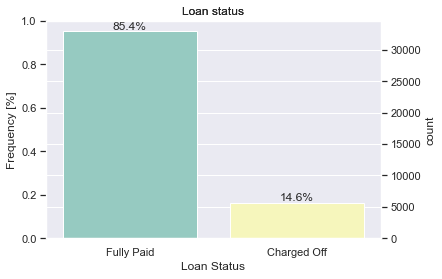

In [24]:
plot_graph('loan_status',loans,'Loan Status','Loan status',None,0, None, 'countplot', None, 5,5)

### Loan Amount

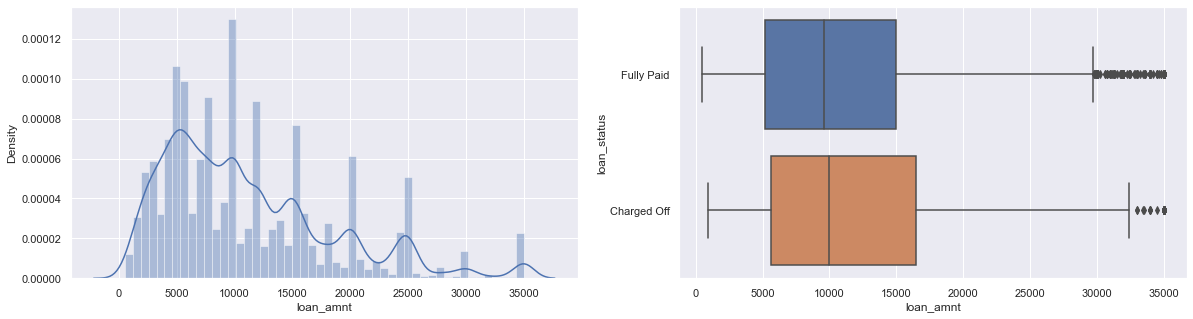

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(loans['loan_amnt'])

plt.subplot(122)
sns.boxplot(x='loan_amnt', y='loan_status', data=loans)
plt.show()

In [26]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


<b>Observation:</b> In category of charged off loans there is a higher loaned amount (since median is higher compared to fully paid)

In [27]:
loans['total_pymnt'].value_counts()

11196.569430    26
11784.232230    16
10956.775960    16
0.000000        16
5478.387981     15
                ..
25078.238940     1
14207.172800     1
8779.300881      1
5981.455752      1
11317.310000     1
Name: total_pymnt, Length: 36714, dtype: int64

### Grade

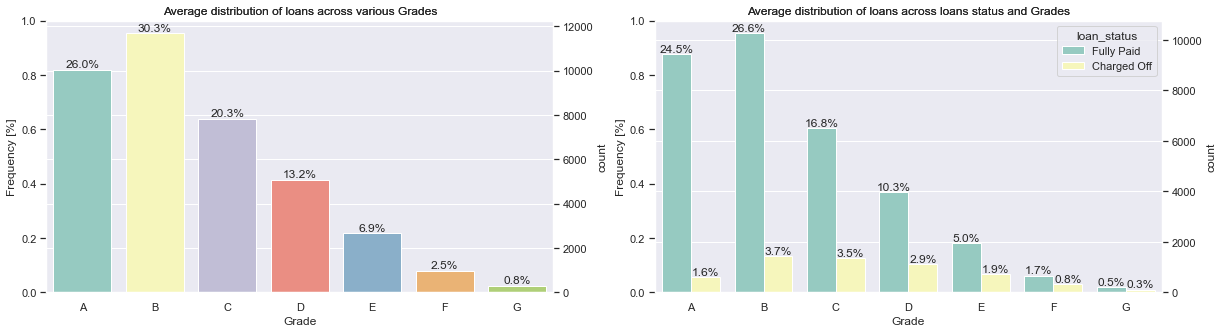

In [28]:
grade_ord = loans.grade.unique()
grade_ord.sort()

plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("grade",loans,'Grade','Average distribution of loans across various Grades', None, 0, None, 'countplot', grade_ord)

plt.subplot(122)
plot_graph("grade",loans,'Grade','Average distribution of loans across loans status and Grades','loan_status', 0, None, 'countplot', grade_ord)

<b>Observation:</b> As grades decrease (considering grades order to be A - G) the number of loans granted decrease and so does the number of bad loans

### Term

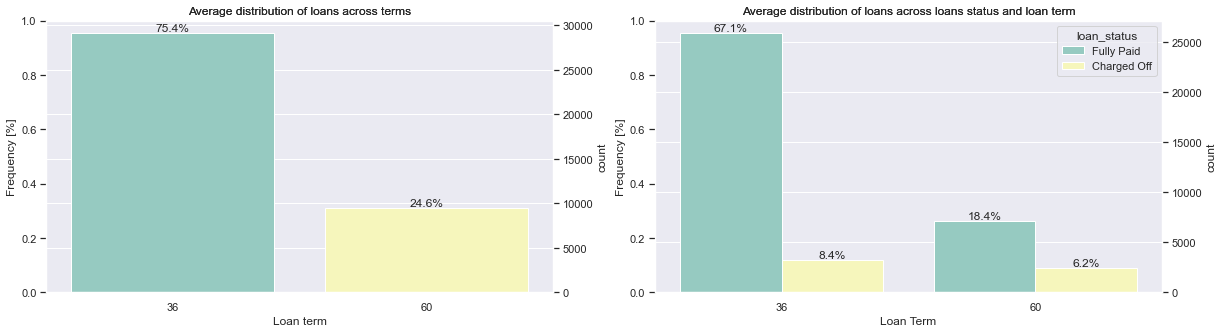

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("term",loans,'Loan term','Average distribution of loans across terms')

plt.subplot(122)
plot_graph("term",loans,'Loan Term','Average distribution of loans across loans status and loan term','loan_status')

<b>Observation:</b> Higher term leads to increase in defaulters

### Delinq_2_yrs - number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

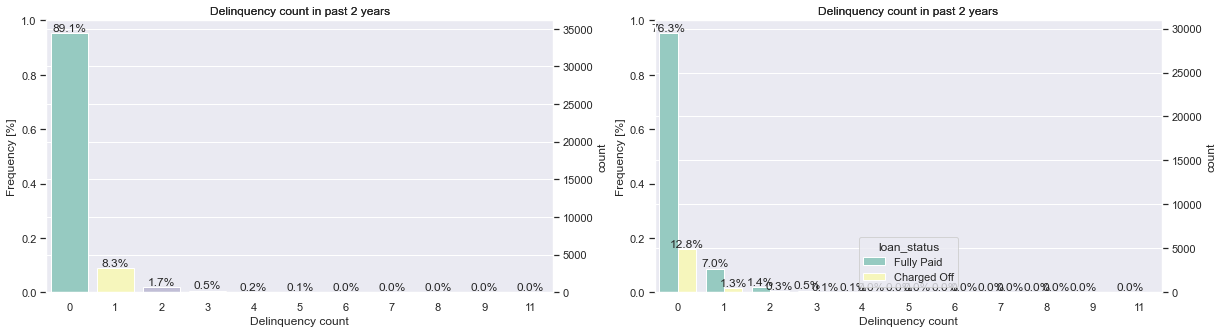

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("delinq_2yrs",loans,'Delinquency count','Delinquency count in past 2 years')

plt.subplot(122)
plot_graph("delinq_2yrs",loans,'Delinquency count','Delinquency count in past 2 years','loan_status')

<b>Observation:</b> Majority loans have delinquency count as 0.

### Interest rate

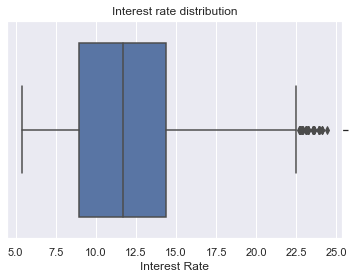

In [31]:
plot_graph('int_rate',loans,'Interest Rate','Interest rate distribution',None,0, None,'boxplot')

In [32]:
# create bins for int_rate range
int_bins = [0, 7.5, 10, 12.5, 15, 100]
int_bucket = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loans['int_rate_range'] = pd.cut(loans['int_rate'], int_bins, labels=int_bucket)
loans['int_rate_range'].value_counts()

10-12.5    9380
12.5-15    8885
15+        7996
7.5-10     6946
0-7.5      5370
Name: int_rate_range, dtype: int64

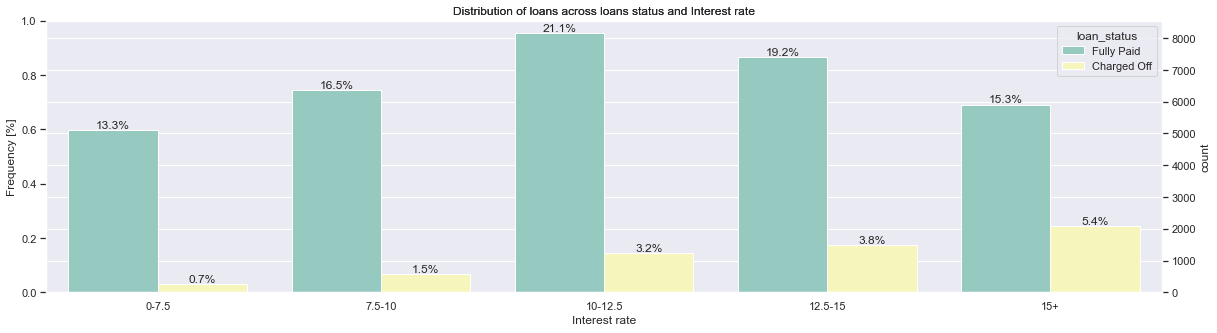

In [33]:
plt.figure(figsize=(20, 5))
plot_graph("int_rate_range",loans,'Interest rate','Distribution of loans across loans status and Interest rate','loan_status')

<b>Observation</b> - 
1. On an average most of the interest rates are between 9 and 15%. While in some cases customers took interest rate as high as 22.5%
2. As interest rate increases percentage of bad loans also increases

### Employment length

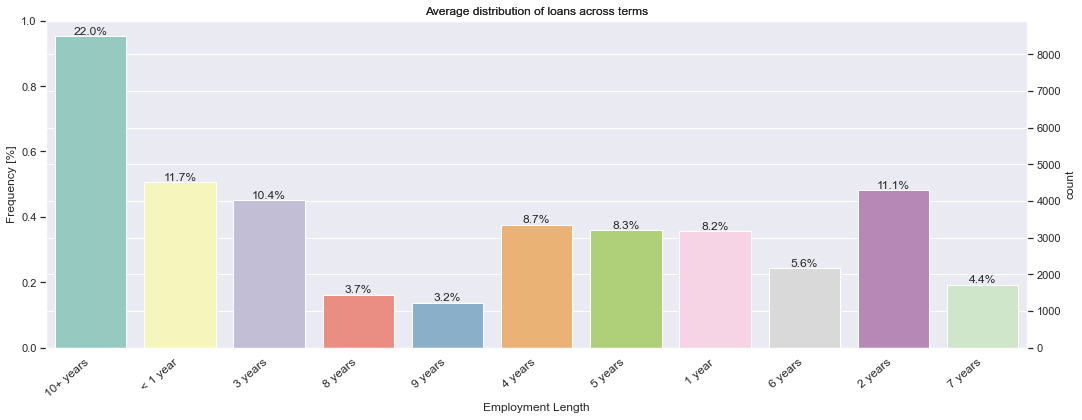

In [34]:
plt.figure(figsize=(15, 6))
plot_graph("emp_length",loans,'Employment Length','Average distribution of loans across terms', None, 1)

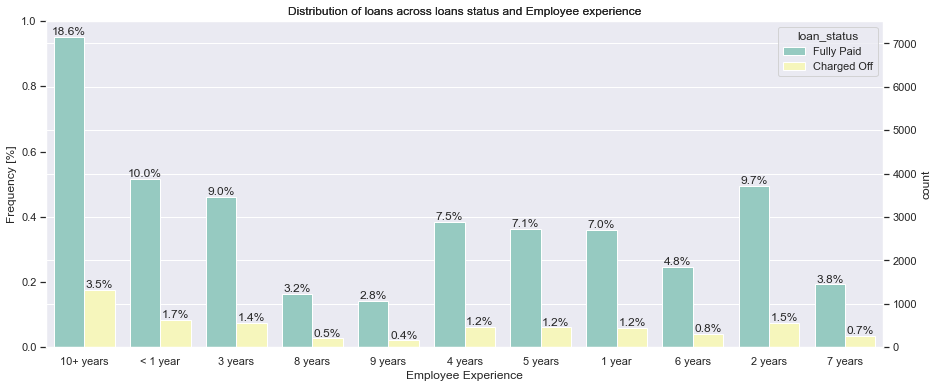

In [35]:
plt.figure(figsize=(15, 6))
plot_graph("emp_length",loans,'Employee Experience','Distribution of loans across loans status and Employee experience','loan_status')

<b>Observation: </b>:
1. In 10+ years experienced group, though charged off loans are also high, but if you look at the ratio of fully paid: charged off loans its low

### Home Ownership

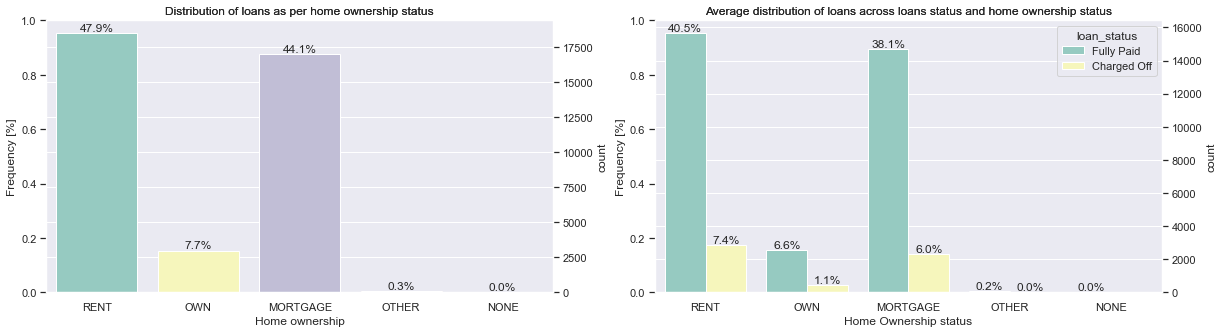

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("home_ownership",loans,'Home ownership','Distribution of loans as per home ownership status')

plt.subplot(122)
plot_graph("home_ownership",loans,'Home Ownership status','Average distribution of loans across loans status and home ownership status','loan_status')

<b>Observation:</b> 
- Percentage of bad loans is higher for rented / mortaged property owner.
- More number of borrowers have rented / mortaged homes

### Verification Status

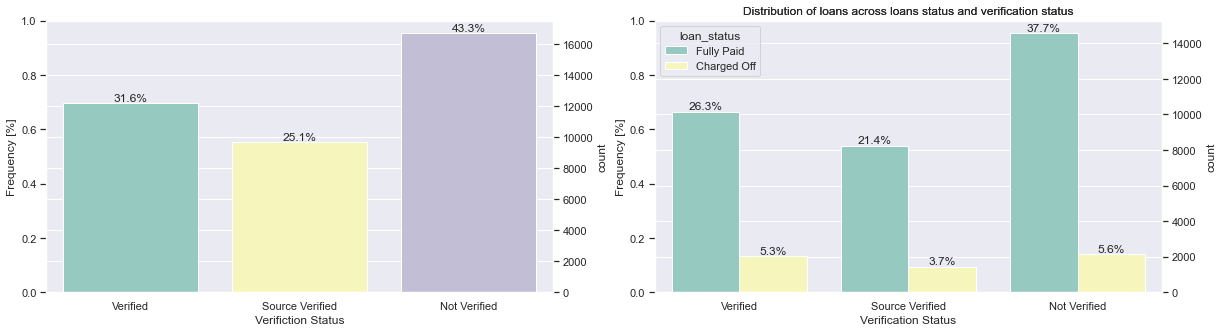

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("verification_status",loans,'Verifiction Status',None)

plt.subplot(122)
plot_graph("verification_status",loans,'Verification Status','Distribution of loans across loans status and verification status','loan_status')

<b>Observation: </b> Though there is higher ratio between Fully paid and Charged off loans when it comes to verification status ' Not verified', however if you see overall as compared to other verification status there is not much difference. Hence it cannot be considered as a deciding factor

### Purpose

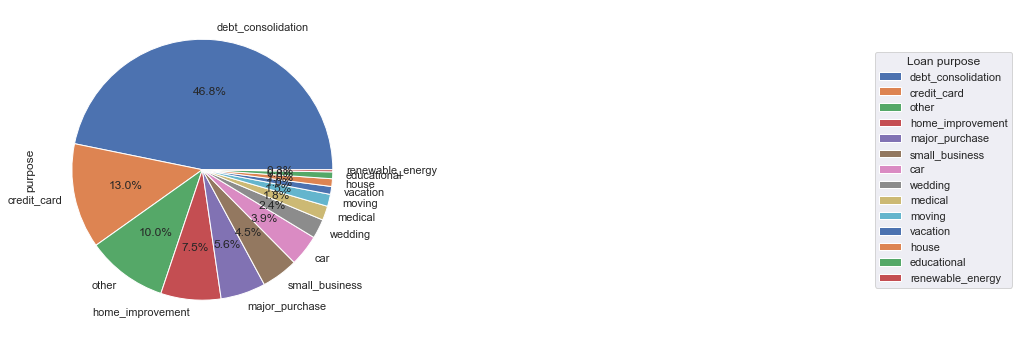

In [38]:
plt.figure(figsize=(15, 6))
loans['purpose'].value_counts().plot(kind='pie', legend=True, autopct='%1.1f%%')
plt.legend(loc="right", title="Loan purpose", bbox_to_anchor=(1,0,2,1))
plt.show()

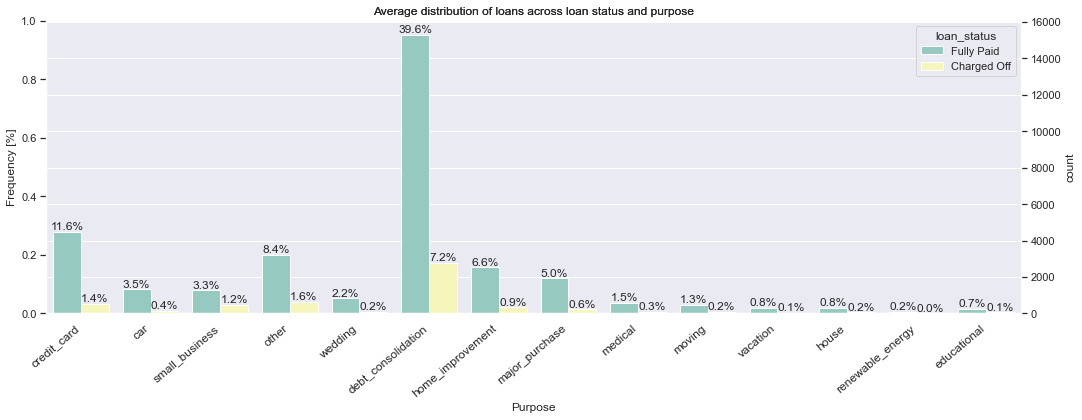

In [39]:
plt.figure(figsize=(15, 6))
plot_graph("purpose",loans,'Purpose','Average distribution of loans across loan status and purpose','loan_status',1)

<b>Observation</b>: 
- Almost 47% of the loans have been taken for the purpose of debt consolidation
- loans taken for the purpose of debt consolidation have higher probability of turning into bad loans

### Annual income

In [40]:
# since there are many distinct values of annual income binning them would help in further analysis
ai_bins = [0, 25000, 50000, 75000, 100000, 1000000]
ai_bucket = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loans['annual_inc_range'] = pd.cut(loans['annual_inc'], ai_bins, labels=ai_bucket)

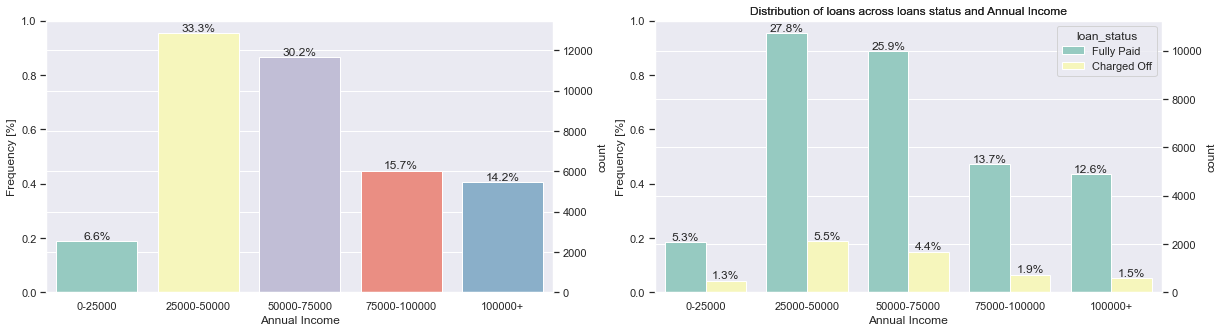

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("annual_inc_range",loans,'Annual Income',None)

plt.subplot(122)
plot_graph("annual_inc_range",loans,'Annual Income','Distribution of loans across loans status and Annual Income','loan_status')

<b>Observation: </b> With the exception of 0-25000, the percentage of charged off loans increased as annual income decreases 

### DTI (Debt to income)

In [42]:
# since there are many distinct values in dti, hence they need to be binned for further analysis
dti_bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
dti_bucket = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loans['dti_range'] = pd.cut(loan['dti'], dti_bins, labels=dti_bucket)

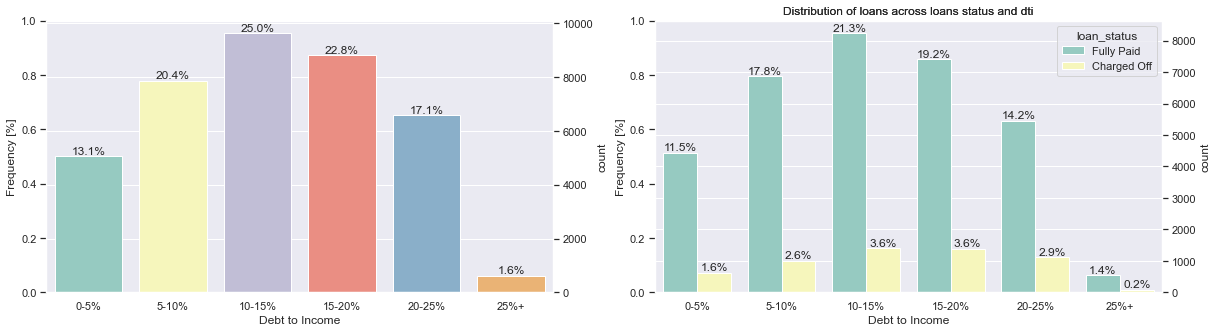

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("dti_range",loans,'Debt to Income',None)

plt.subplot(122)
plot_graph("dti_range",loans,'Debt to Income','Distribution of loans across loans status and dti','loan_status')

### Open credit lines in borrower's credit file

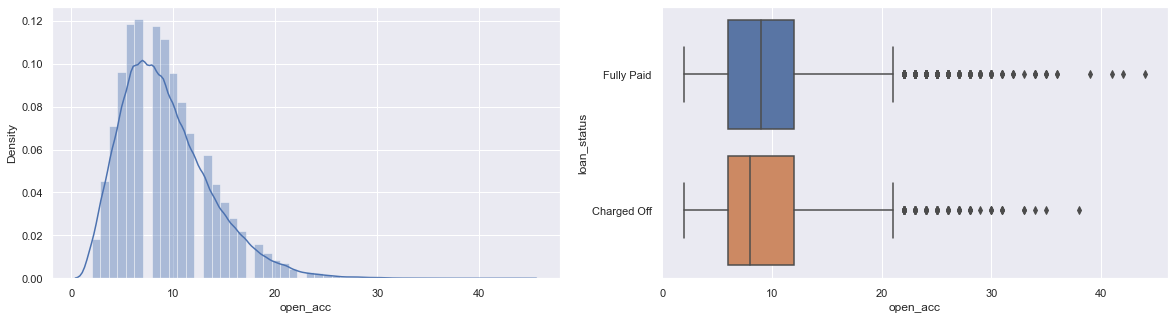

In [44]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(loans['open_acc'])

plt.subplot(122)
sns.boxplot(x='open_acc', y='loan_status', data=loans)
plt.show()

<b>Observation:</b> There is not much of difference between fully paid and bad loans. Hence this is not a good factor to consider

### Derogatory public records

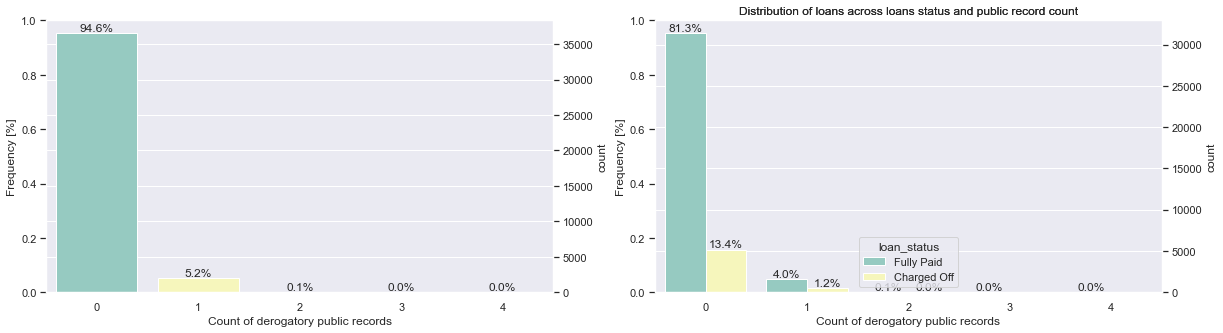

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("pub_rec",loans,'Count of derogatory public records',None)

plt.subplot(122)
plot_graph("pub_rec",loans,'Count of derogatory public records','Distribution of loans across loans status and public record count','loan_status')

<b>Observation: </b> There are very few loans where pub_rec > 0 and hence this process is already in place  

### pub_rec_bankruptcies

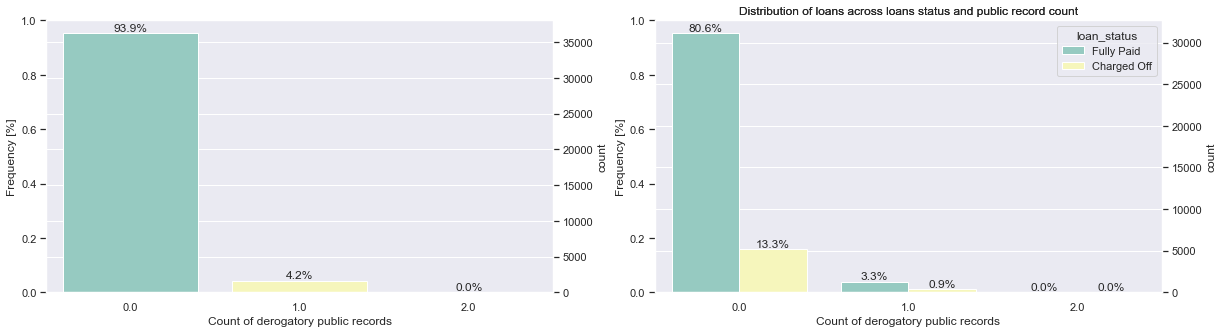

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("pub_rec_bankruptcies",loans,'Count of derogatory public records',None)

plt.subplot(122)
plot_graph("pub_rec_bankruptcies",loans,'Count of derogatory public records','Distribution of loans across loans status and public record count','loan_status')

<b>Observation: </b> Data for pub_rec_bankruptcies and pub_rec is almost having same pattern

### State code

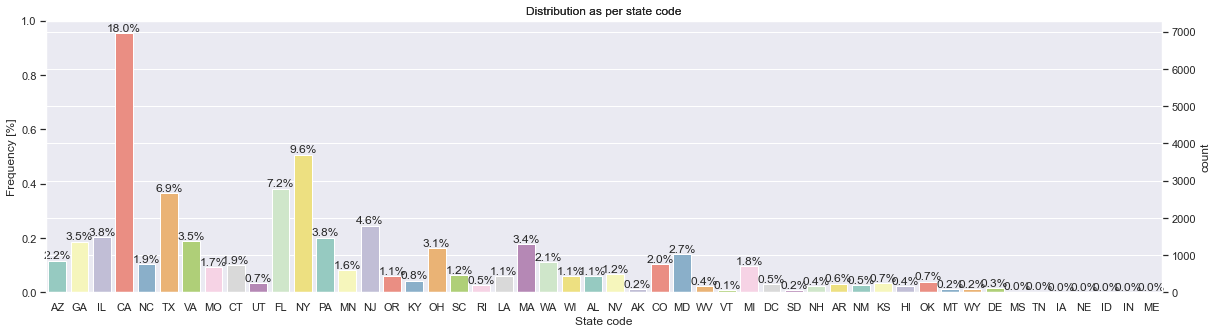

In [47]:
plt.figure(figsize=(20, 5))
plot_graph("addr_state",loans,'State code',"Distribution as per state code")

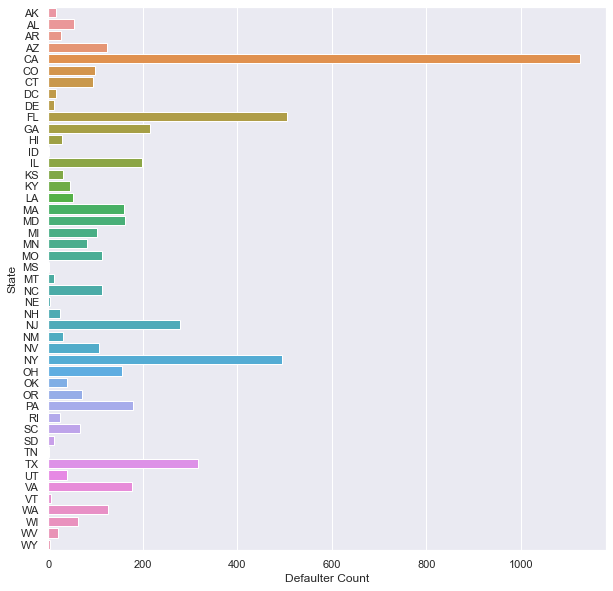

In [48]:
state_default = loans[loans['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x='loan_status', y='addr_state', data=state_default)
plt.xlabel('Defaulter Count')
plt.ylabel('State')
plt.show()

<b>Observation: </b> California state has maximum loan applicants and the defaulter percentage is also high from this state

### Loan issue month

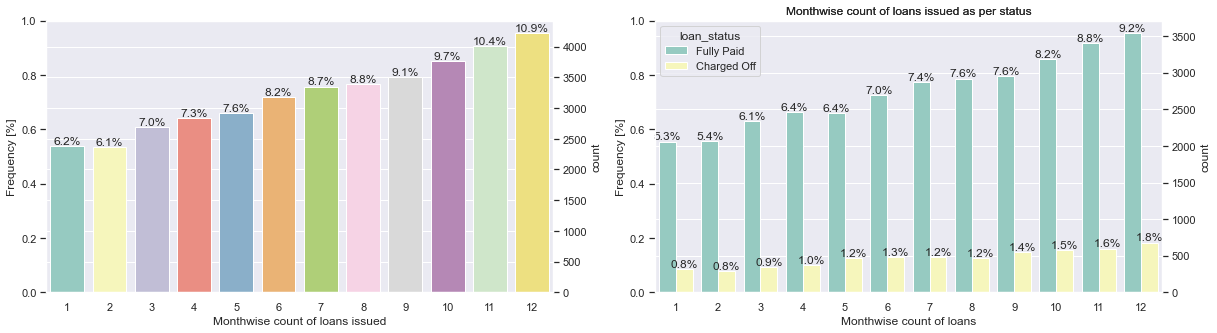

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("issue_d_month",loans,'Monthwise count of loans issued',None)

plt.subplot(122)
plot_graph("issue_d_month",loans,'Monthwise count of loans','Monthwise count of loans issued as per status','loan_status')

<b>Observation: </b> Majority loans have been issues in December. Infact the number of loans issued increases from Jan - Dec

### Loan issue year

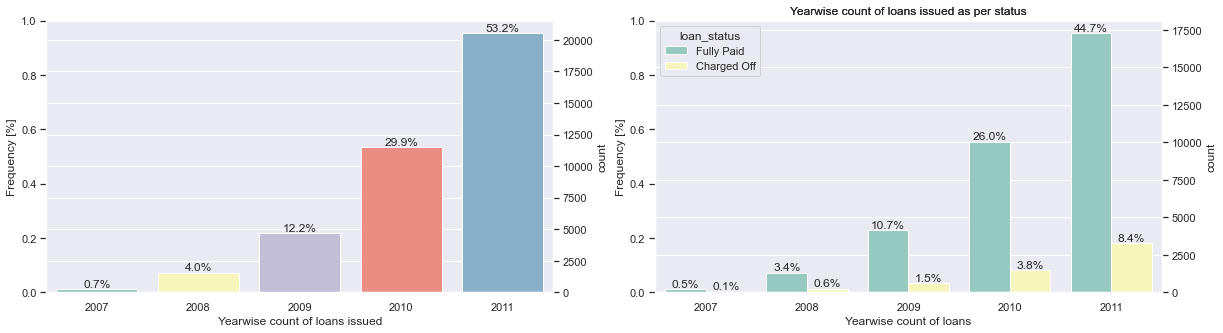

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot_graph("issue_d_year",loans,'Yearwise count of loans issued',None)

plt.subplot(122)
plot_graph("issue_d_year",loans,'Yearwise count of loans','Yearwise count of loans issued as per status','loan_status')

<b>Observation: </b>
- Number of loans has increased every year 
- Number of defaulters has also increased with every passing year

### Installment

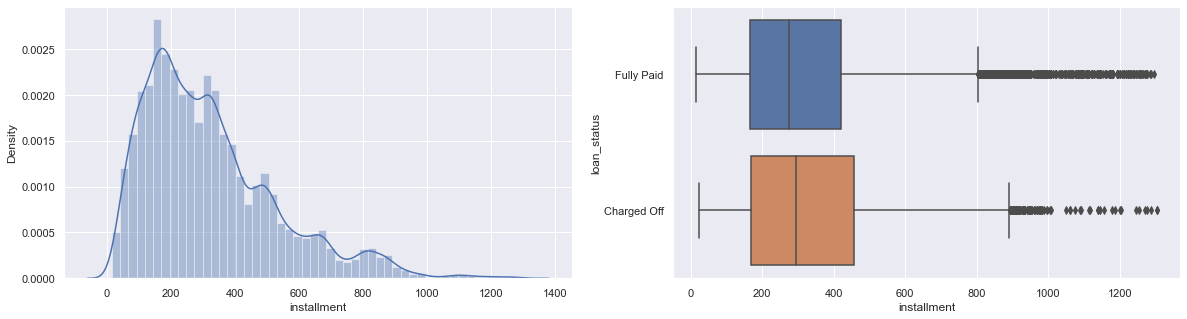

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(loans['installment'])

plt.subplot(122)
sns.boxplot(x='installment', y='loan_status', data=loans)
plt.show()

In [52]:
loans.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


<b>Observation: </b> - Charged off loans have higher installments

### Total payment received

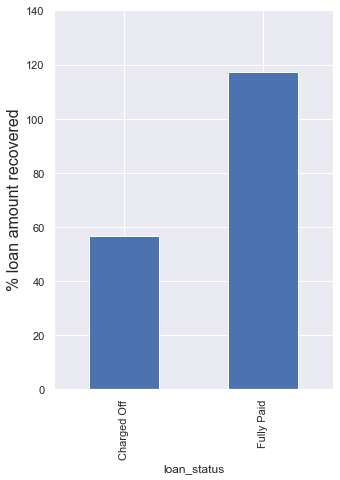

In [53]:
plt.figure(figsize=(5,7))
ax = (loans.groupby('loan_status').total_pymnt.sum() * 100 / loans.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan amount recovered', fontsize=16)
plt.margins(0.2, 0.2)

<b>Observation: </b> For charged off loans around 56% of the loan amount has been recovered, while for Fully paid ones more than 100% of loan amount has been recovered

## Bivariate analysis

### Loan amount - grade

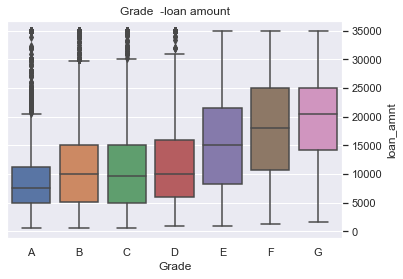

In [54]:
plot_graph("grade",loans,'Grade','Grade  -loan amount',None, 0, 'loan_amnt', 'boxplot', grade_ord)

<b>Observation:</b> Lower grades seem to request for larger loan amount as compared to higher grades

### Loan amount - grade - term

<Figure size 1440x360 with 0 Axes>

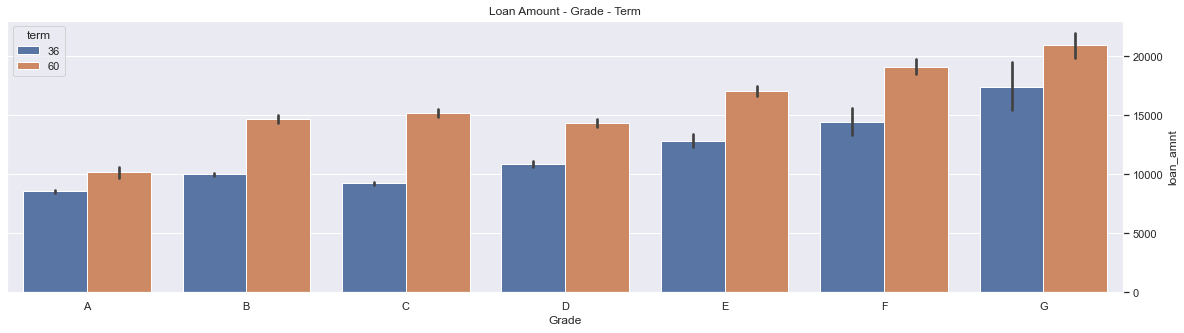

In [55]:
plt.figure(figsize=(20,5))
plot_graph("grade",loans,'Grade', 'Loan Amount - Grade - Term','term', 0, 'loan_amnt', 'barplot', grade_ord)

<b>Observation:</b> 
- Lower grades seem to request for larger loan amount as compared to higher grades
- no distinction found in terms of Loan term

### Loan amount - verification status  - loan status

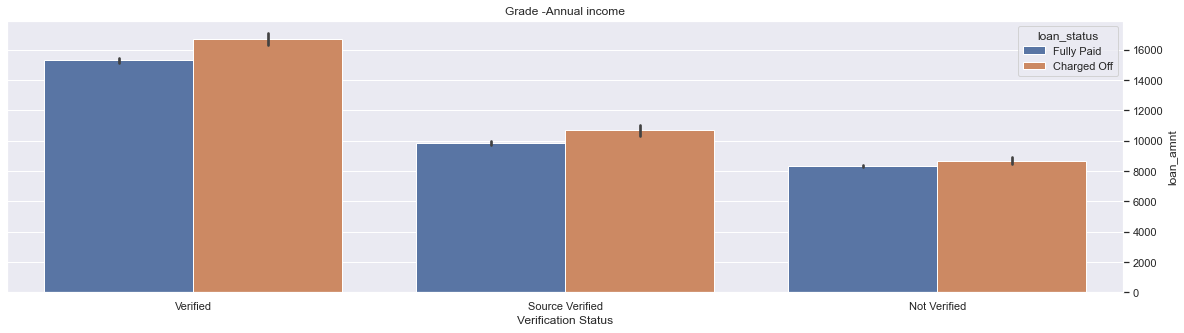

In [56]:
plot_graph("verification_status",loans,'Verification Status','Grade -Annual income','loan_status', 0, 'loan_amnt', 'barplot')

<b>Observation:</b> 
- High value loans are generally verified
- However on the basis of verification status there is not much of a difference

### Term - Interest Rate                                       &                                                Grade - Interest rate

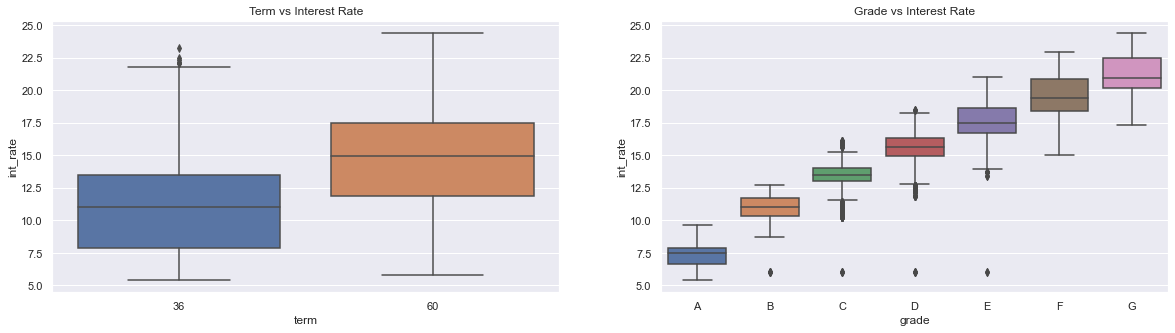

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x = 'term', y = 'int_rate', data = loans)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
sns.boxplot(x = 'grade', y = 'int_rate', order = grade_ord, data = loans)
plt.show()

### delinq_2yr - loan amount - grade

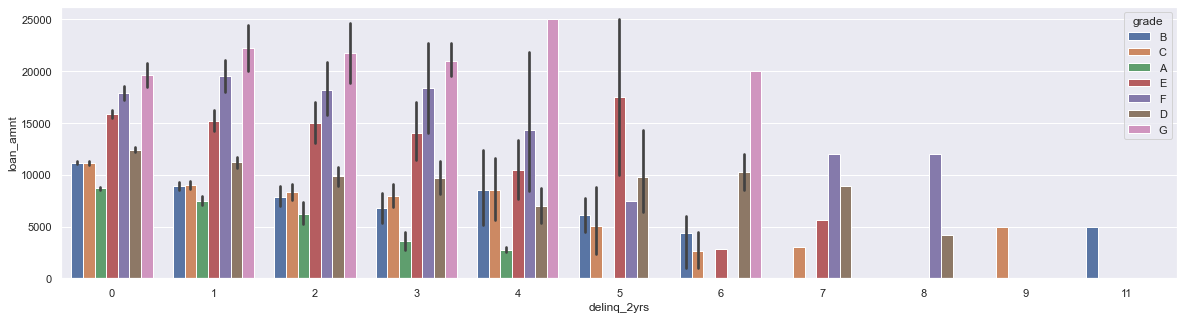

In [58]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=loans, estimator=np.mean)
#plot_graph('delinq_2yrs',loans,'delinq_2yrs','delinq_2yr - loan amount - grade','grade',0, 'loan_amnt', 'barplot')
plt.show()

<b>Observation: </b> 
1. For higher counts of delinquency the count of loans is low as well as loan amount granted
2. Looking at the graph we can make out that lower delinquency count results in higher grade (considering grade A is higher than B) and subsequently higher loan amounts and more chances of loan being approved 

### annual income - purpose

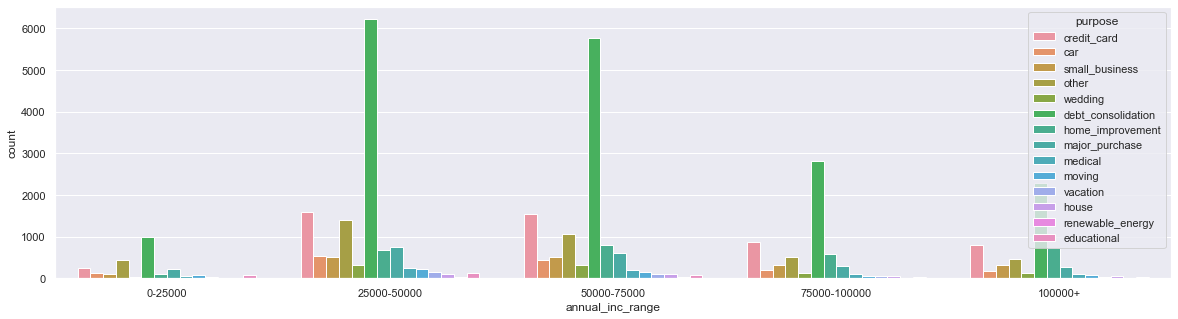

In [59]:
plt.figure(figsize=(20,5))
sns.countplot(x='annual_inc_range', hue="purpose", data=loans)
plt.show()

### annual income - grade

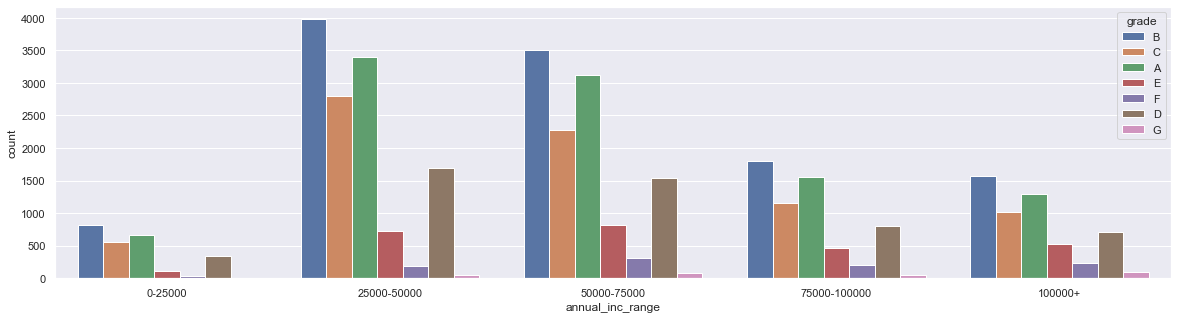

In [60]:
plt.figure(figsize=(20,5))
sns.countplot(x='annual_inc_range', hue="grade", data=loans)
plt.show()

<b>Observation</b>: There is no clear pattern here

### Loan amount - issue year

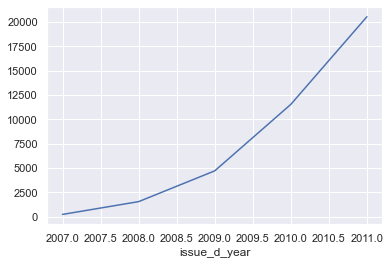

In [61]:
loans.groupby('issue_d_year').loan_amnt.count().plot(kind='line')
plt.show()

### Loan amount - addr_state - loan Status

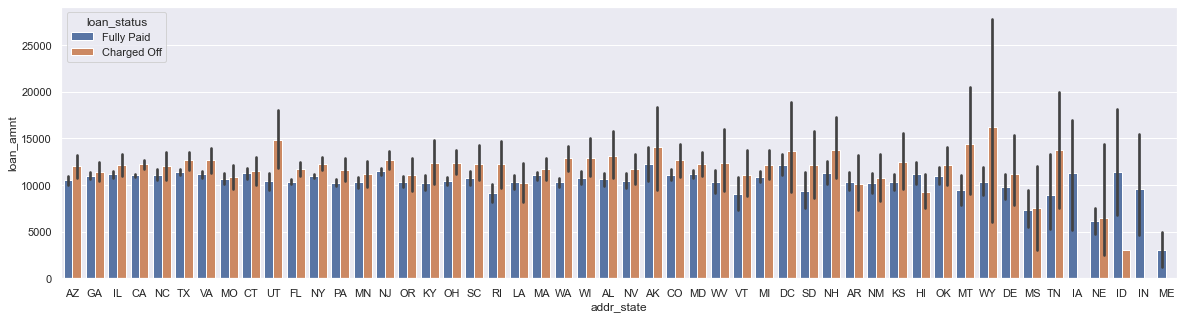

In [62]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loans, estimator=np.mean)
plt.show()

### loan status - term - purpose

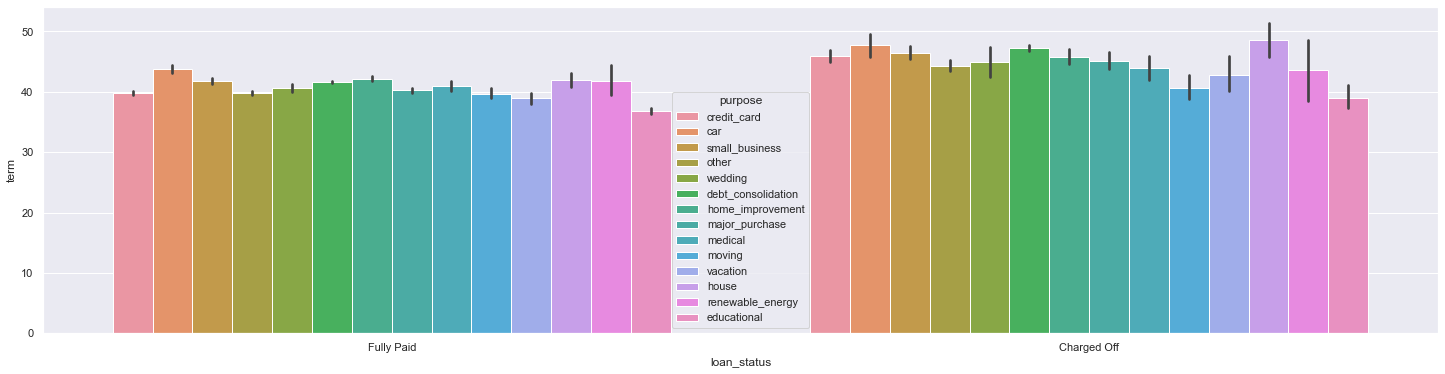

In [63]:
plt.figure(figsize=(25,6))
sns.barplot(x="loan_status", y='term', hue="purpose", data=loans)
plt.show()

### loan status - int rate - purpose

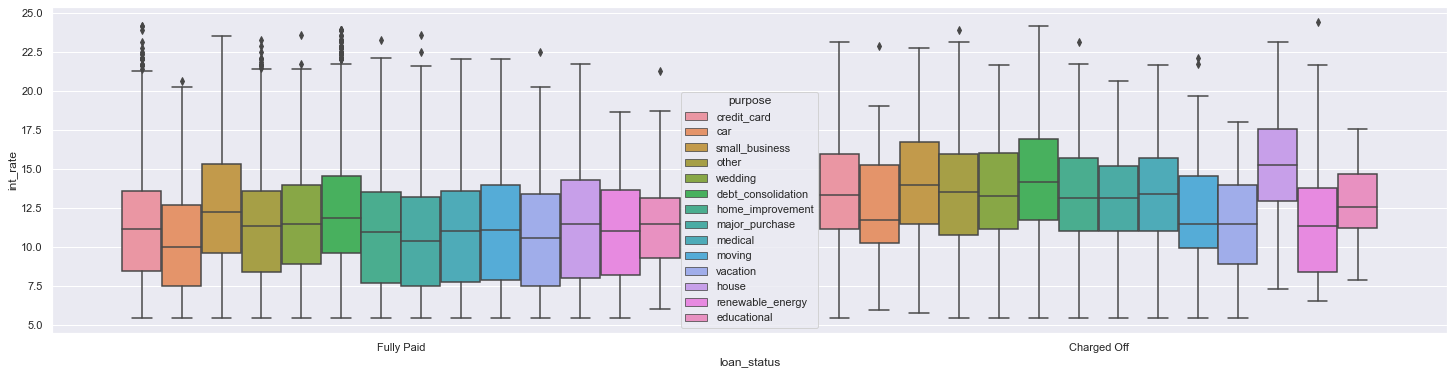

In [64]:
plt.figure(figsize=(25,6))
sns.boxplot(x="loan_status", y='int_rate', hue="purpose", data=loans)
plt.show()

### delinq_2yr - int_rate - loan_status

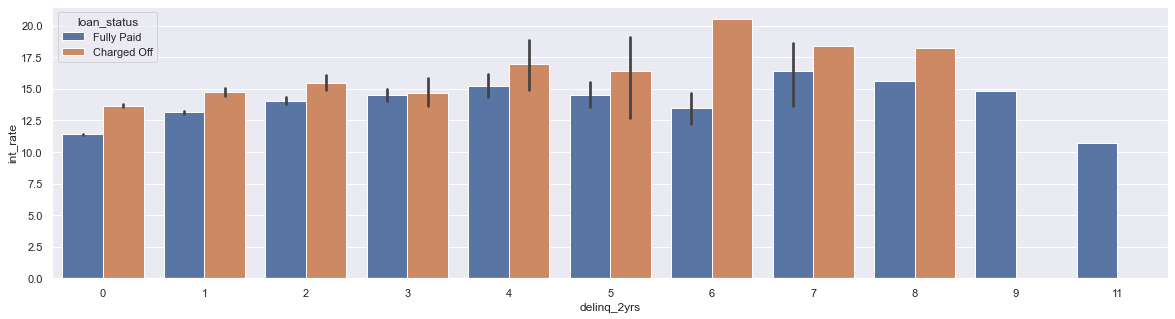

In [65]:
plt.figure(figsize=(20,5))
#plot_graph('delinq_2yrs',loans,'Employee Experience','Distribution of loans across loans status and Employee experience','grade', 0, 'loan_amnt')
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loans, estimator=np.mean)
plt.show()

<b>Observation: </b> 
1. No clear difference on the basis of delinquency count and charged off loan count as even with higher count of delinquency instances loans are fully paid (but yes less amount of loans are given)
2. As loan interest increases the amount of charged off loans also increase

### term - purpose

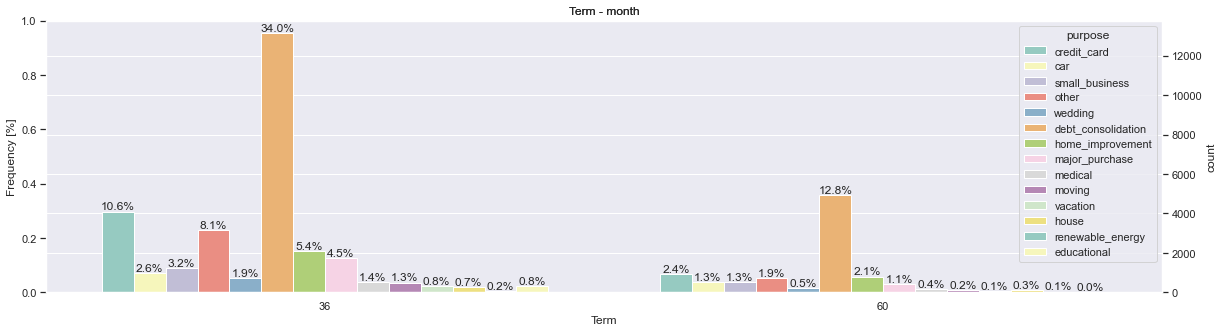

In [66]:
plt.figure(figsize=(20,5))
plot_graph('term',loans,'Term','Term - month','purpose')

<b>Observation</b>: Lower tenure results in higher proportion of defaulters

## Multivariate analysis using clustermap (heatmap with dendogram)

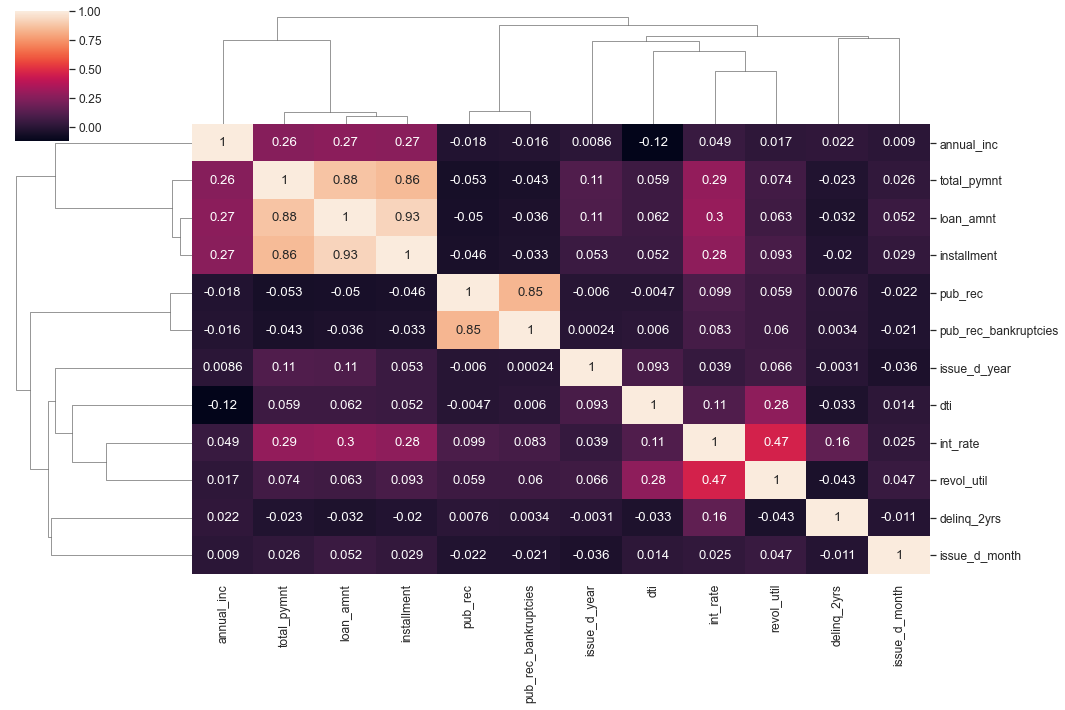

In [67]:
var = ['loan_amnt', 'int_rate', 'pub_rec', 'dti', 'installment', 'revol_util', 'delinq_2yrs', 'total_pymnt', 'annual_inc',
      'issue_d_month', 'issue_d_year', 'pub_rec_bankruptcies']

corr = loans[var].corr()
#sns.heatmap(corr, annot=True, center=0.5)
sns.set(font_scale=1.1)
sns.clustermap(corr,annot=True,figsize=(15, 10))
plt.show()



<b>Observation:</b>
- Loan amount, annual income & total payment are strongly correlated.
- Annual income to DTI(Debt-to-income ratio) is negatively related.